<a href="https://colab.research.google.com/github/ShowBaba/Machine-Learning-/blob/master/001_Copy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [0]:
# load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
z = test_df['EmployeeNo']
train_df.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [0]:
train_df['Qualification'].unique()

array(['MSc, MBA and PhD', 'First Degree or HND', nan,
       'Non-University Education'], dtype=object)

In [0]:
y = train_df.iloc[:, -1]

In [0]:
# merge the datasets for processing
df = [train_df, test_df]
df = pd.concat(df, keys=['x', 'y'], sort=False)
df = df.drop(columns=['EmployeeNo', 'Promoted_or_Not'])
df.head(10)

Division        Qualification  Gender  \
x 0         Commercial Sales and Marketing     MSc, MBA and PhD  Female   
  1  Customer Support and Field Operations  First Degree or HND    Male   
  2         Commercial Sales and Marketing  First Degree or HND    Male   
  3         Commercial Sales and Marketing  First Degree or HND    Male   
  4               Information and Strategy  First Degree or HND    Male   
  5  Customer Support and Field Operations  First Degree or HND  Female   
  6  Customer Support and Field Operations     MSc, MBA and PhD    Male   
  7               Information and Strategy  First Degree or HND    Male   
  8         Commercial Sales and Marketing     MSc, MBA and PhD    Male   
  9         Commercial Sales and Marketing  First Degree or HND  Female   

      Channel_of_Recruitment  Trainings_Attended  Year_of_birth  \
x 0  Direct Internal process                   2           1986   
  1        Agency and others                   2           1991   
  2  Direct Internal process                   2           1987   
  3        Agency and others                   3           1982   
  4  Direct Internal process                   3           1990   
  5        Agency and others                   2           1990   
  6  Direct Internal process                   2           1988   
  7        Agency and others                   2           1993   
  8  Direct Internal process                   2           1989   
  9  Direct Internal process                   2           1986   

     Last_performance_score  Year_of_recruitment  Targets_met  Previous_Award  \
x 0                    12.5                 2011            1               0   
  1                    12.5                 2015            0               0   
  2                     7.5                 2012            0               0   
  3                     2.5                 2009            0               0   
  4                     7.5                 2012            0               0   
  5                     7.5                 2014            0               0   
  6                     7.5                 2013            0               0   
  7                    10.0                 2014            0               0   
  8                    12.5                 2014            1               0   
  9                    12.5                 2016            1               0   

     Training_score_average State_Of_Origin Foreign_schooled Marital_Status  \
x 0                      41         ANAMBRA               No        Married   
  1                      52         ANAMBRA              Yes        Married   
  2                      42         KATSINA              Yes        Married   
  3                      42           NIGER              Yes         Single   
  4                      77       AKWA IBOM              Yes        Married   
  5                      51           ENUGU              Yes        Married   
  6                      55             OYO               No         Single   
  7                      75           LAGOS              Yes        Married   
  8                      46            ONDO              Yes        Married   
  9                      42           LAGOS              Yes        Married   

    Past_Disciplinary_Action Previous_IntraDepartmental_Movement  \
x 0                       No                                  No   
  1                       No                                  No   
  2                       No                                  No   
  3                       No                                  No   
  4                       No                                  No   
  5                       No                                 Yes   
  6                       No                                  No   
  7                       No                                  No   
  8                       No                                  No   
  9                       No

In [0]:
# check for null values
df.isnull().sum()

Division                                  0
Qualification                          2409
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
dtype: int64

In [0]:
# filling the null values based on the "Foreign_schooled " column
df_null = df.groupby('Targets_met').Qualification.transform(lambda x: x.fillna(x.mode()[0]))

In [0]:
# dropping the "Qualification" column that has null values and adding the clean coolumn
df = df.drop(columns=['Qualification'])
df['Qualification'] = df_null  

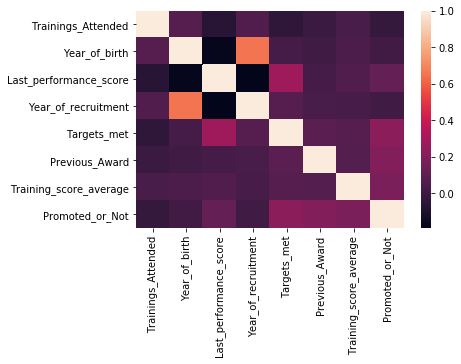

In [0]:
# data visualization
sns.heatmap(train_df.corr())

In [0]:
df.isnull().sum()

Division                               0
Gender                                 0
Channel_of_Recruitment                 0
Trainings_Attended                     0
Year_of_birth                          0
Last_performance_score                 0
Year_of_recruitment                    0
Targets_met                            0
Previous_Award                         0
Training_score_average                 0
State_Of_Origin                        0
Foreign_schooled                       0
Marital_Status                         0
Past_Disciplinary_Action               0
Previous_IntraDepartmental_Movement    0
No_of_previous_employers               0
Qualification                          0
dtype: int64

In [0]:
# collecting columns with categorical datas
cat_col = []
for i in df.columns:
    if df[i].dtype == 'O':
        cat_col.append(i)
    else:
        pass
    
cat_col

['Division',
 'Gender',
 'Channel_of_Recruitment',
 'State_Of_Origin',
 'Foreign_schooled',
 'Marital_Status',
 'Past_Disciplinary_Action',
 'Previous_IntraDepartmental_Movement',
 'No_of_previous_employers',
 'Qualification']

In [0]:
# using pandas's get dummies to encode
df = pd.get_dummies(df, columns=cat_col)
df.head()

Trainings_Attended  Year_of_birth  Last_performance_score  \
x 0                   2           1986                    12.5   
  1                   2           1991                    12.5   
  2                   2           1987                     7.5   
  3                   3           1982                     2.5   
  4                   3           1990                     7.5   

     Year_of_recruitment  Targets_met  Previous_Award  Training_score_average  \
x 0                 2011            1               0                      41   
  1                 2015            0               0                      52   
  2                 2012            0               0                      42   
  3                 2009            0               0                      42   
  4                 2012            0               0                      77   

     Division_Business Finance Operations  \
x 0                                     0   
  1                                     0   
  2                                     0   
  3                                     0   
  4                                     0   

     Division_Commercial Sales and Marketing  \
x 0                                        1   
  1                                        0   
  2                                        1   
  3                                        1   
  4                                        0   

     Division_Customer Support and Field Operations  ...  \
x 0                                               0  ...   
  1                                               1  ...   
  2                                               0  ...   
  3                                               0  ...   
  4                                               0  ...   

     No_of_previous_employers_0  No_of_previous_employers_1  \
x 0                           1                           0   
  1                           1                           0   
  2                           1                           0   
  3                           0                           1   
  4                           0                           1   

     No_of_previous_employers_2  No_of_previous_employers_3  \
x 0                           0                           0   
  1                           0                           0   
  2                           0                           0   
  3                           0                           0   
  4                           0                           0   

     No_of_previous_employers_4  No_of_previous_employers_5  \
x 0                           0                           0   
  1                           0                           0   
  2                           0                           0   
  3                           0                           0   
  4                           0                           0   

     No_of_previous_employers_More than 5  Qualification_First Degree or HND  \
x 0                                     0                                  0   
  1                                     0                                  1   
  2                                     0                                  1   
  3                                     0                                  1   
  4                                     0                                  1   

     Qualification_MSc, MBA and PhD  Qualification_Non-University Education  
x 0                               1                                       0  
  1                               0                                       0  
  2                               0                                       0  
  3                               0                                       0  
  4                               0                                       0  

[5 rows x 77 columns]

In [0]:
df.shape

(54808, 77)

In [0]:
# splitting the dataset back to test and train using the keys 'x' & 'y'
train_df = df.loc['x']
test_df = df.loc['y']
train_df.shape
test_df.shape

(16496, 77)

In [0]:
train_df.shape

(38312, 77)

In [0]:
X = train_df.iloc[:, :]
# y = train_df.iloc[:, -1]
Z = test_df.iloc[:,:]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
import xgboost as xgb
import time


start_time = time.time()
clf = xgb.XGBClassifier(max_depth=5,
                n_estimators=2500,
                learning_rate=0.1, 
                colsample_bytree=0.9,
                min_child_weight = 3,
                seed=1200,
                booster='dart'
                
                )
                
clf.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="auc",
        eval_set=[(X_train, y_train), (X_test, y_test)])

pred = clf.predict(X_test)
print(f'Done in {time.time() - start_time} seconds')

[0]	validation_0-auc:0.824092	validation_1-auc:0.821592
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.829937	validation_1-auc:0.825366
[2]	validation_0-auc:0.830352	validation_1-auc:0.825268
[3]	validation_0-auc:0.855094	validation_1-auc:0.845036
[4]	validation_0-auc:0.862011	validation_1-auc:0.850151
[5]	validation_0-auc:0.864238	validation_1-auc:0.852129
[6]	validation_0-auc:0.864637	validation_1-auc:0.852033
[7]	validation_0-auc:0.866448	validation_1-auc:0.854368
[8]	validation_0-auc:0.871076	validation_1-auc:0.859204
[9]	validation_0-auc:0.871582	validation_1-auc:0.859423
[10]	validation_0-auc:0.871506	validation_1-auc:0.860193
[11]	validation_0-auc:0.874898	validation_1-auc:0.864475
[12]	validation_0-auc:0.87594	validation_1-auc:0.865411
[13]	validation_0-auc:0.877341	validation_1-auc:0.866628
[14]	validation_0-auc:0.877109	validation_1-auc:0.866107

[142]	validation_0-auc:0.936901	validation_1-auc:0.908318
[143]	validation_0-auc:0.936978	validation_1-auc:0.908273
[144]	validation_0-auc:0.937117	validation_1-auc:0.908276
[145]	validation_0-auc:0.937262	validation_1-auc:0.90828
[146]	validation_0-auc:0.93732	validation_1-auc:0.908307
[147]	validation_0-auc:0.937344	validation_1-auc:0.908301
[148]	validation_0-auc:0.937405	validation_1-auc:0.908359
[149]	validation_0-auc:0.937511	validation_1-auc:0.908379
[150]	validation_0-auc:0.937562	validation_1-auc:0.908434
[151]	validation_0-auc:0.937687	validation_1-auc:0.908436
[152]	validation_0-auc:0.937914	validation_1-auc:0.908533
[153]	validation_0-auc:0.938121	validation_1-auc:0.908504
[154]	validation_0-auc:0.938442	validation_1-auc:0.908524
[155]	validation_0-auc:0.938591	validation_1-auc:0.908464
[156]	validation_0-auc:0.938727	validation_1-auc:0.908389
[157]	validation_0-auc:0.938851	validation_1-auc:0.908371
[158]	validation_0-auc:0.938965	validation_1-auc:0.908352
[159]	validation

C:\Users\SAMUEL PC\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
clf.score(X_train, y_train)
# 0.9430233425311358
# 0.9450696055684454

C:\Users\SAMUEL PC\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9444403012901782

In [0]:
# predictions = clf.predict(Z)
# prediction = pd.DataFrame(predictions)
# prediction.index = z
# prediction.index.name = 'EmployeeNo'
# prediction.columns=['Promoted_or_Not']
# prediction.to_csv('predictions_9X.csv')

In [0]:
# stacking
pred = clf.predict(Z)
merged = pd.read_csv('hy.csv')
merged_values = merged['Promoted_or_Not'].values

C:\Users\SAMUEL PC\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
sums = pred+merged_values
merged['Promoted_or_Not'] = sums

In [0]:
merged['Promoted_or_Not'] = merged['Promoted_or_Not'].map(lambda x: x if x==0 else 1)

In [0]:
pd.value_counts(sums)

0    15976
2      486
1       34
dtype: int64

In [0]:
merged.to_csv('hy_test3.csv', index=False)

In [0]:
merged['Promoted_or_Not'].value_counts()

0    15976
1      520
Name: Promoted_or_Not, dtype: int64

In [0]:
clf_new = xgb.XGBClassifier()
clf_new.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [0]:
clf_new.score(X_train, y_train)

C:\Users\SAMUEL PC\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9378029681557163